<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** *Replace this cell with your problem statement.*

How will the Singapore government plan to manage water efficiently? To be sufficient to meet the water needs of the people and reduce water imports from abroad in year 2023.

Rainfall affects daily activities of Singapore population, hence it is worth analysing rainfall data to identify trends 

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [158]:
# Code:
def calculate_mean(values):
    if len(values) == 0:
        return None # Return None for an empty list to avoid division by zero
    
    total = 0
    for value in values:
        total += value
        
    mean = total / len(values)
    return mean

sample_data = [10, 20, 30,40,50]

result = calculate_mean(sample_data)
print("mean:", result)


mean: 30.0


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [159]:
# Code:
def cal_std_dev(values):
    if len(values) < 2:
        return None #Standard deviation requires at leat two data points

#Mean value 
    total = 0
    for value in values:
        total += value
    mean = total/len(values)
    
#calculate the sum of squared difference from the mean
    sum_sqr_diff = sum((x-mean) **2 for x in values)

#calculate variance
    variance = sum_sqr_diff / (len(values)-1)

#calculate the std deviation
    standard_deviation = variance ** (1/2)
    return standard_deviation

#Test function
sample_data = [10, 20, 30, 40, 50]
result = cal_std_dev(sample_data)
print("SD value is:", result)
import numpy as np
print(np.std(sample_data, ddof=1))

SD value is: 15.811388300841896
15.811388300841896


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [160]:
# Imports:
# Imports:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [161]:
# Code:
#1.
#Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.

df1 = pd.read_csv('rainfall-monthly-number-of-rain-days.csv')
df2 = pd.read_csv('rainfall-monthly-total.csv')
df0 = pd.read_csv('SurfaceAirTemperatureMonthlyMean.csv')
df4 = pd.read_csv('RelativeHumidityMonthlyMean.csv')

print("First 5 rows of DataFrame 1:")
print(df1.head())
print("First 5 rows of DataFrame 2:")
print(df2.head())
print("First 5 rows of DataFrame 3:")
print(df0.head())
print("First 5 rows of DataFrame 4:")
print(df4.head())
#Check for missing values and datatype.
missing_values1 = df1.isnull().sum()
missing_values2 = df2.isnull().sum()
missing_values3 = df0.isnull().sum()
missing_values4 = df4.isnull().sum()

print("Missing values DataFrame 1:")
print(missing_values1)
print("Missing values DataFrame 2:")
print(missing_values2)
print("Missing values DataFrame 3:")
print(missing_values3)

print("Missing values DataFrame 3:")
print(missing_values4)

First 5 rows of DataFrame 1:
     month  no_of_rainy_days
0  1982-01                10
1  1982-02                 5
2  1982-03                11
3  1982-04                14
4  1982-05                10
First 5 rows of DataFrame 2:
     month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2
First 5 rows of DataFrame 3:
     month  mean_temp
0  1982-01       25.9
1  1982-02       27.1
2  1982-03       27.2
3  1982-04       27.0
4  1982-05       28.0
First 5 rows of DataFrame 4:
     month  mean_rh
0  1982-01     81.2
1  1982-02     79.5
2  1982-03     82.3
3  1982-04     85.9
4  1982-05     83.2
Missing values DataFrame 1:
month               0
no_of_rainy_days    0
dtype: int64
Missing values DataFrame 2:
month             0
total_rainfall    0
dtype: int64
Missing values DataFrame 3:
month        0
mean_temp    0
dtype: int64
Missing values DataFrame 3:
month      0
mean_rh    0
dtype

In [162]:
# Code:
df3 = pd.merge(df1, df2, on='month', how='inner')  # 'inner' performs an inner join
df3 = pd.merge(df3, df0, on='month', how='inner')  # 'inner' performs an inner join
df3 = pd.merge(df3, df4, on='month', how='inner')  # 'inner' performs an inner join
df3 = df3.rename(columns={'mean_rh': 'mean_re_humid'})
df3.head()


,month,no_of_rainy_days,total_rainfall,mean_temp,mean_re_humid
0,1982-01,10,107.1,25.9,81.2
1,1982-02,5,27.8,27.1,79.5
2,1982-03,11,160.8,27.2,82.3
3,1982-04,14,157.0,27.0,85.9
4,1982-05,10,102.2,28.0,83.2


In [163]:
# Code:
#create new columns
df3[['year', 'month']] = df3['month'].str.split('-', expand=True)
df3.head()

# Export the DataFrame to a CSV file
df3.to_csv('output.csv', index=False)  # 'index=False' to omit writing row indices to the file

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|month|object|rainfall-monthly-total|month|
|Year|object|rainfall-monthly-total|Year|
|total_rainfall|float|rainfall-monthly-total|Total rainfall in mm|
|no_of_rainy_days|number|rainfall-monthly-number-of-rain-days|A number of rainy days|
|mean_temp|float|SurfaceAirTemperatureMonthlyMean|Surface air temperature monthly mean|
|mean_re_humid|float|RelativeHumidityMonthlyMean|Monthly mean relative humidity|**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

In [164]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   month             488 non-null    object 
 1   no_of_rainy_days  488 non-null    int64  
 2   total_rainfall    488 non-null    float64
 3   mean_temp         488 non-null    float64
 4   mean_re_humid     488 non-null    float64
 5   year              488 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 26.7+ KB


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [165]:
#Code:
sd_no_of_rainy_days = cal_std_dev(df3['no_of_rainy_days'])
sd_total_rainfall = cal_std_dev(df3['total_rainfall'])
sd_mean_temp = cal_std_dev(df3['mean_temp'])
sd_mean_rh = cal_std_dev(df3['mean_re_humid'])

sd= {
    'rainfall-monthly-total': sd_no_of_rainy_days,
    'no_of_rainy_days': sd_total_rainfall,
    'mean_temp': sd_mean_temp,
    'mean_rh': sd_mean_rh
}

sd

{'rainfall-monthly-total': 4.947393841903985,
 'no_of_rainy_days': 113.91602880233788,
 'mean_temp': 0.8021948874761341,
 'mean_rh': 3.413939611926605}

In [166]:
summary_stats = df3.describe()

# Print the summary statistics
print(summary_stats)

       no_of_rainy_days  total_rainfall   mean_temp  mean_re_humid
count        488.000000      488.000000  488.000000     488.000000
mean          14.061475      177.163730   27.678893      82.247541
std            4.947394      113.916029    0.802195       3.413940
min            1.000000        0.200000   25.400000      72.000000
25%           11.000000       93.850000   27.100000      80.000000
50%           14.000000      159.450000   27.700000      82.650000
75%           18.000000      238.075000   28.300000      84.700000
max           27.000000      765.900000   29.500000      90.700000


In [167]:
#Code: Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
years_to_analyze = ['1990', '2000', '2010', '2020']
filtered_df = df3[df3['year'].isin(years_to_analyze)]
monthly_total_rainfall = filtered_df.groupby(['year', 'month'])['total_rainfall'].sum().reset_index()

result = {}
for year in years_to_analyze:
    year_data = monthly_total_rainfall[monthly_total_rainfall['year'] == year]
    max_month = year_data.loc[year_data['total_rainfall'].idxmax()]['month']
    min_month = year_data.loc[year_data['total_rainfall'].idxmin()]['month']
    result[year] = {
        'highest_rainfall_month': max_month,
        'lowest_rainfall_month': min_month
    }

result
# # Print the results
# for year, months in result.items():
#     print(f"Year {year}:")
#     print(f"Highest Rainfall Month: {month['highest_rainfall_month']}")
#     print(f"Lowest Rainfall Month: {month['lowest_rainfall_month']}")
#     print()

{'1990': {'highest_rainfall_month': '09', 'lowest_rainfall_month': '02'},
 '2000': {'highest_rainfall_month': '11', 'lowest_rainfall_month': '09'},
 '2010': {'highest_rainfall_month': '07', 'lowest_rainfall_month': '02'},
 '2020': {'highest_rainfall_month': '05', 'lowest_rainfall_month': '02'}}

In [168]:
#Code: Which year have the highest and lowest total rainfall in the date range of analysis?
yearly_total_rainfall = df3.groupby('year')['total_rainfall'].sum()


# Find the year with the highest total rainfall
highest_rainfall_year = yearly_total_rainfall.idxmax()

# Find the year with the lowest total rainfall
lowest_rainfall_year = yearly_total_rainfall.idxmin()

# Print the results
print(f"The year with the highest total rainfall is: {highest_rainfall_year}")
print(f"The year with the lowest total rainfall is: {lowest_rainfall_year}")

The year with the highest total rainfall is: 2007
The year with the lowest total rainfall is: 1997


In [169]:
#Code: Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
years_to_analyze = ['1990', '2000', '2010', '2020']
filtered_data = df3[df3['year'].isin(years_to_analyze)]
# Group the data by year and month, and count the number of rainy days for each month
monthly_rainy_days = filtered_data.groupby(['year', 'month']).sum().reset_index()


# Find the month with the highest and lowest number of rainy days in each year
result = {}
for year in years_to_analyze:
    year_data = monthly_rainy_days[monthly_rainy_days['year'] == year]
    max_month = year_data.loc[year_data['no_of_rainy_days'].idxmax()]['month']
    min_month = year_data.loc[year_data['no_of_rainy_days'].idxmin()]['month']
    result[year] = {
        'highest_rainy_days_month': max_month,
        'lowest_rainy_days_month': min_month
    }
result
# Print the results
# for year, months in result.items():
#     print(f"Year {year}:")
#     print(f"Highest Rainfall Month: {months['highest_rainy_days_month']}")
#     print(f"Lowest Rainfall Month: {months['lowest_rainy_days_month']}")
#     print()


{'1990': {'highest_rainy_days_month': '09', 'lowest_rainy_days_month': '03'},
 '2000': {'highest_rainy_days_month': '11', 'lowest_rainy_days_month': '05'},
 '2010': {'highest_rainy_days_month': '11', 'lowest_rainy_days_month': '02'},
 '2020': {'highest_rainy_days_month': '07', 'lowest_rainy_days_month': '01'}}

In [170]:
#Code: Which year have the highest and lowest total rainy days in the date range of analysis?

# Group the data by year and calculate the total rainy days for each year
yearly_rainy_days = df3.groupby('year')['no_of_rainy_days'].sum()

# Find the year with the highest and lowest total rainfall
year_highest_yearly_rainy_days = yearly_rainy_days.idxmax()
year_lowest_yearly_rainy_days = yearly_rainy_days.idxmin()

print(f"Year with the highest total rainy days {year_highest_yearly_rainy_days}")
print(f"Year with the lowest total rainy days: {year_lowest_yearly_rainy_days}")

Year with the highest total rainy days 2013
Year with the lowest total rainy days: 1997


In [171]:
#Code: Are there any outliers months in the dataset?

monthly_rainfall = df3.groupby('month')['total_rainfall'].mean()


# Calculate the IQR (Interquartile Range)
Q1 = monthly_rainfall.quantile(0.25)
Q3 = monthly_rainfall.quantile(0.75)
IQR = Q3 - Q1


# Define a threshold for potential outliers
threshold = 1.5  # You can adjust this value depending on your data

# Find potential outlier months
potential_outliers = monthly_rainfall[
    (monthly_rainfall < Q1 - threshold * IQR) | (monthly_rainfall > Q3 + threshold * IQR)
]

potential_outliers

# if not potential_outliers.empty:
#     print("Potential outlier months:")
#     print(potential_outliers)
# else:
#     print("No potential outlier months found.")

month
11    256.1700
12    311.0525
Name: total_rainfall, dtype: float64

In [172]:
df3['total_rainfall'].mean()

177.1637295081967

In [173]:
monthly_temp = df3.groupby('month')['mean_temp'].mean().reset_index()

monthly_temp = monthly_temp.sort_values(by = 'mean_temp', ascending=False)

print('Top 5 Month with high temp in every years')
print(monthly_temp.head(5))

Top 5 Month with high temp in every years
  month  mean_temp
4    05  28.487805
5    06  28.407317
3    04  28.119512
6    07  28.075610
7    08  27.968293


**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


C:\Users\Chonn\AppData\Local\Temp\ipykernel_13940\2337962433.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = df3.pivot('year', 'month', 'total_rainfall')


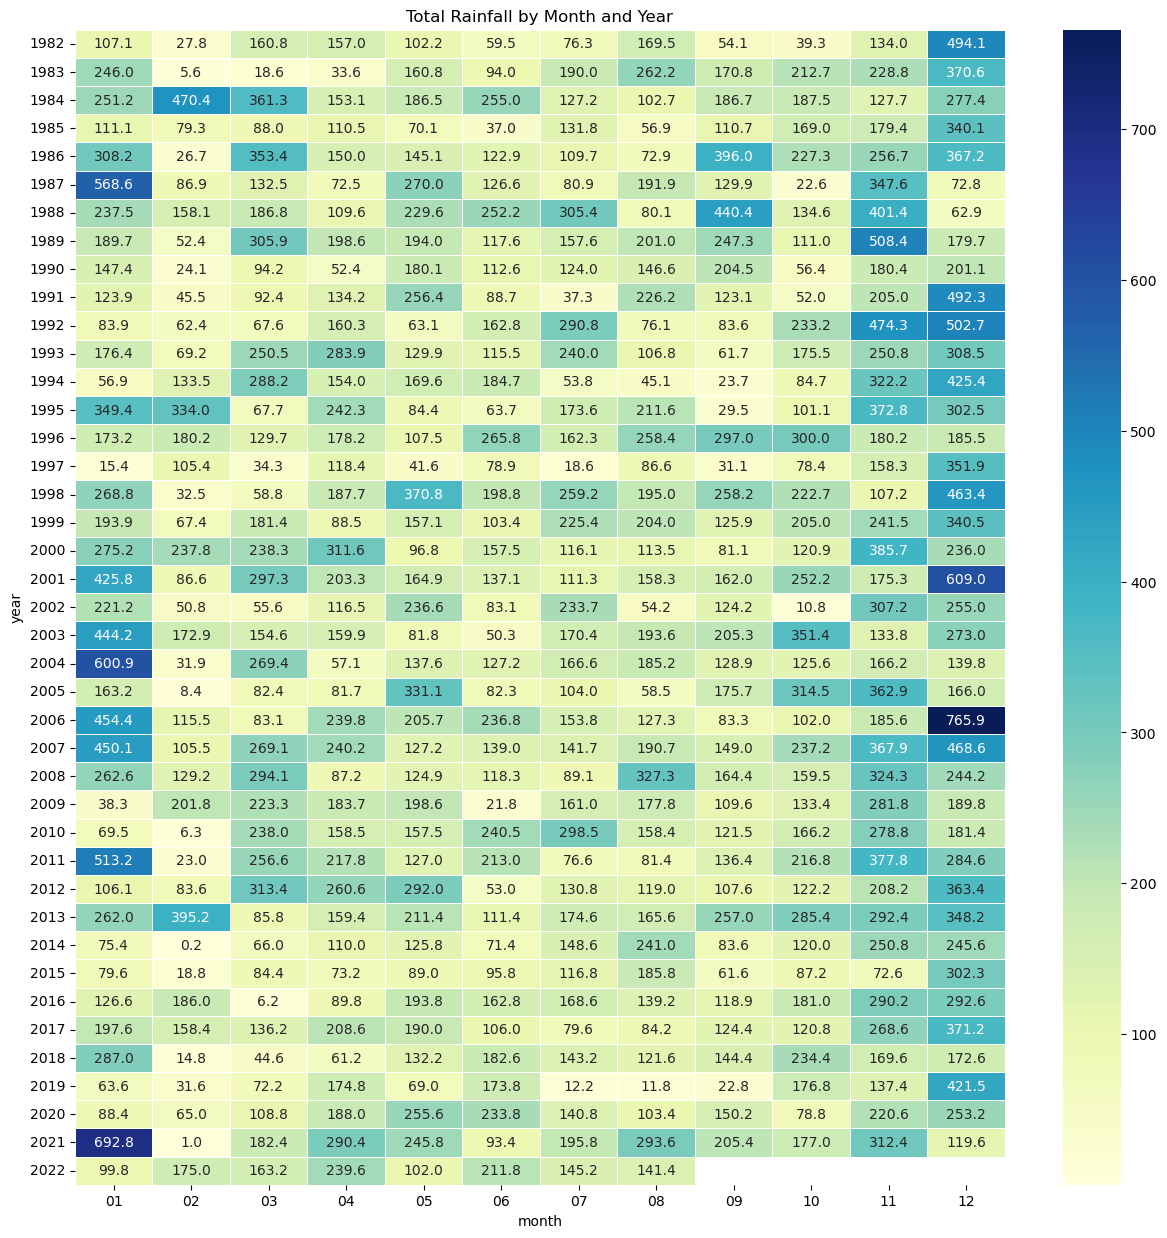

In [174]:
# Code Seaborn's heatmap

heatmap_data = df3.pivot('year', 'month', 'total_rainfall')

# Set up the figure size
plt.figure(figsize=(15, 15))

# Create a heatmap with Seaborn
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)

# Set the title
plt.title("Total Rainfall by Month and Year")

# Display the heatmap
plt.show()

Reference: National Environment Agency (NEA). (2023). Rainfall - Monthly Total. https://beta.data.gov.sg/collections/1398/view

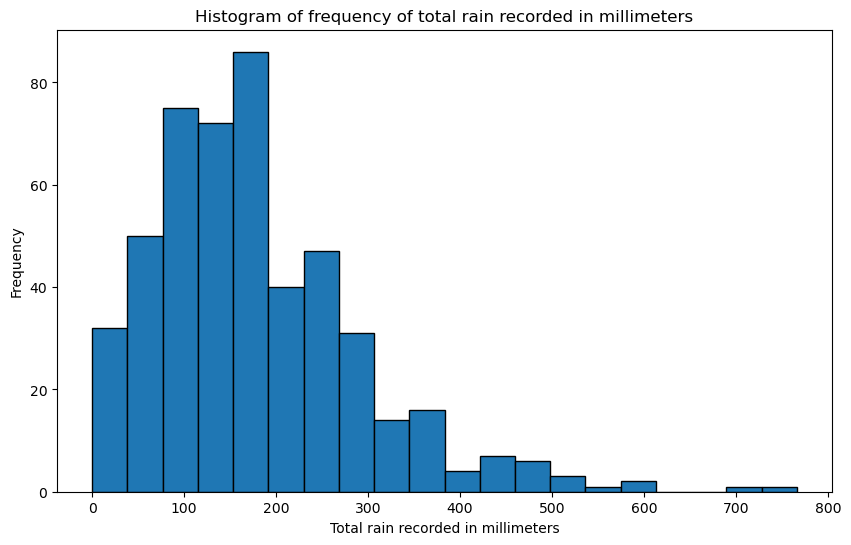

In [176]:
# Visualize distributions using histograms
plt.figure(figsize=(10, 6))

# Create a histogram
plt.hist(df3['total_rainfall'], bins=20, edgecolor='black')

# Set labels and title
plt.xlabel('Total rain recorded in millimeters')
plt.ylabel('Frequency')
plt.title('Histogram of frequency of total rain recorded in millimeters')

# Show the histogram
plt.show()

Reference: National Environment Agency (NEA). (2023). Rainfall - Monthly Number of Rain Days. https://beta.data.gov.sg/collections/1399/view

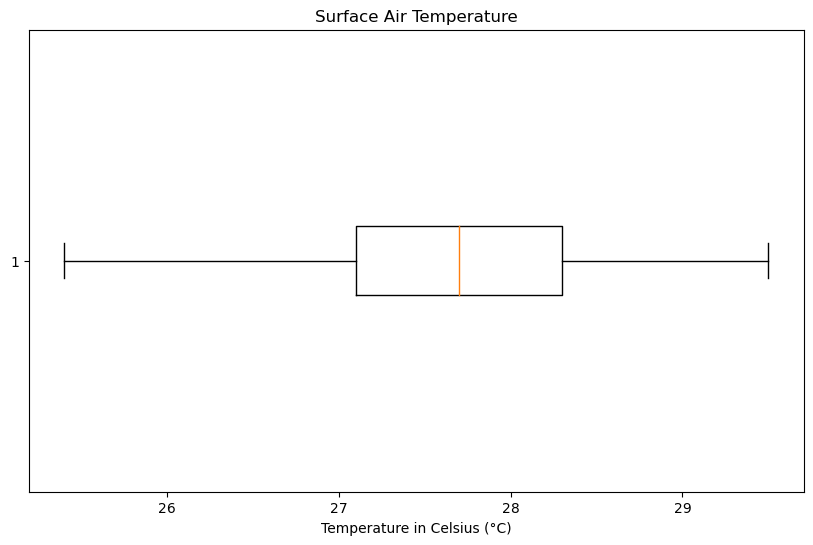

In [177]:
# Create a boxplot
plt.figure(figsize=(10, 6))

plt.boxplot(df3['mean_temp'], vert=False)

# Set labels and title
plt.xlabel('Temperature in Celsius (°C)')
plt.title('Surface Air Temperature')

# Show the boxplot
plt.show()

Reference: National Environment Agency (NEA). (2023). Surface Air Temperature - Monthly Mean. https://beta.data.gov.sg/datasets/d_755290a24afe70c8f9e8bcbf9f251573/view

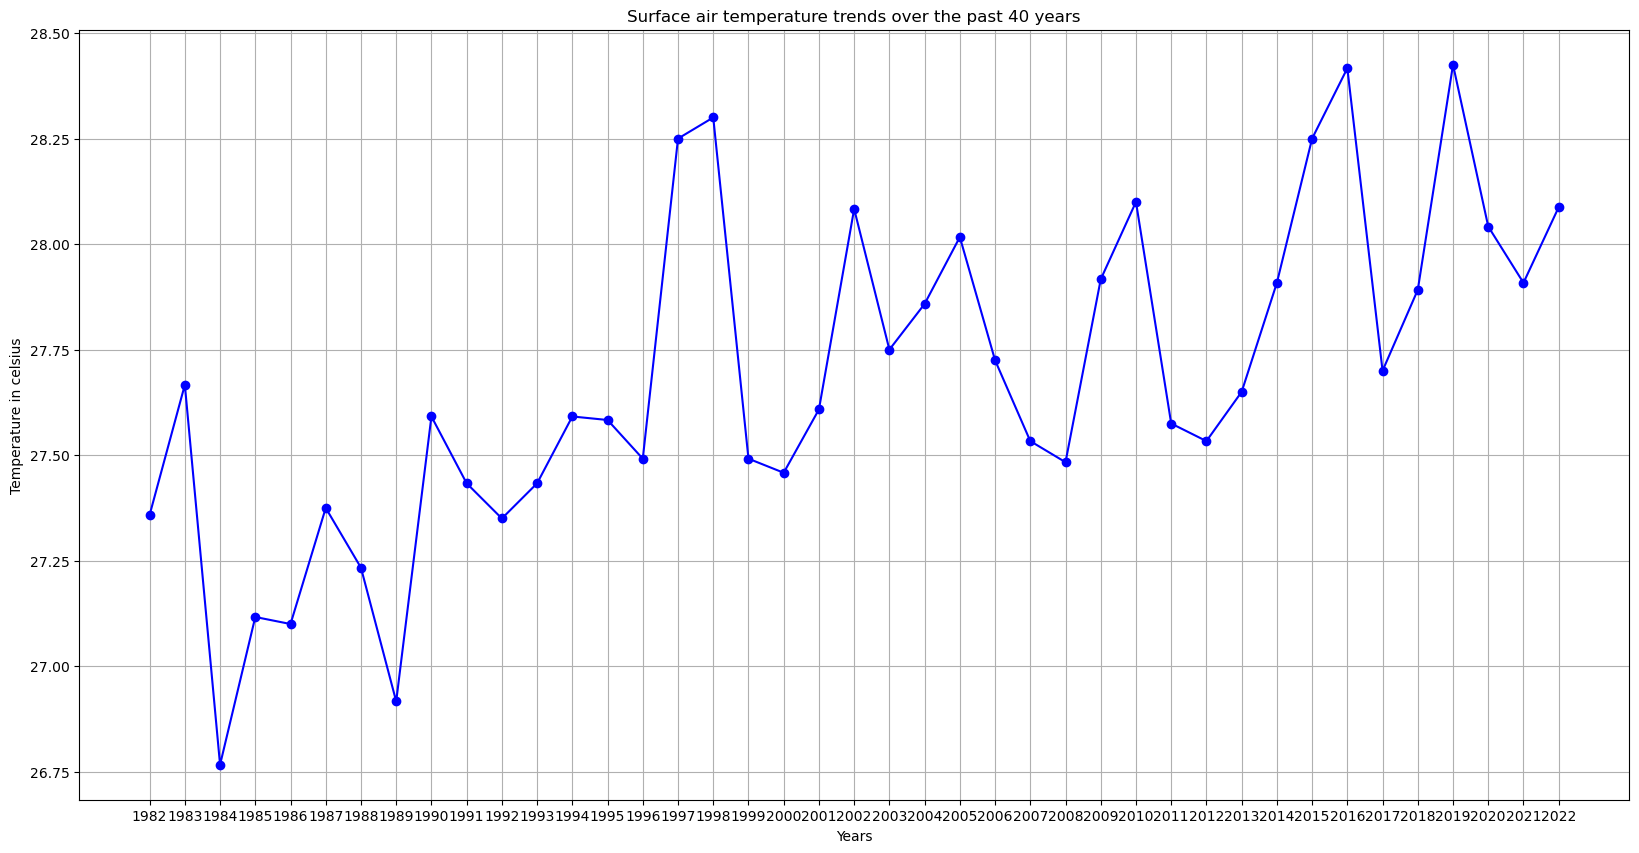

In [178]:


# Sample DataFrame with 'Date' and 'Temperature' columns

grouped = df3.groupby('year')['mean_temp'].mean().reset_index()

# Convert 'Date' column to a datetime object


# Set up the figure size
plt.figure(figsize=(20, 10))

# Create a line graph for temperature data
plt.plot(grouped['year'], grouped['mean_temp'], marker='o', linestyle='-', color='b')

# Label the axes and add a title
plt.xlabel('Years')
plt.ylabel('Temperature in celsius')
plt.title('Surface air temperature trends over the past 40 years')

# Display the graph
plt.grid(True)
plt.show()

Reference: National Environment Agency (NEA). (2023). Surface Air Temperature - Monthly Mean. https://beta.data.gov.sg/datasets/d_755290a24afe70c8f9e8bcbf9f251573/view

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


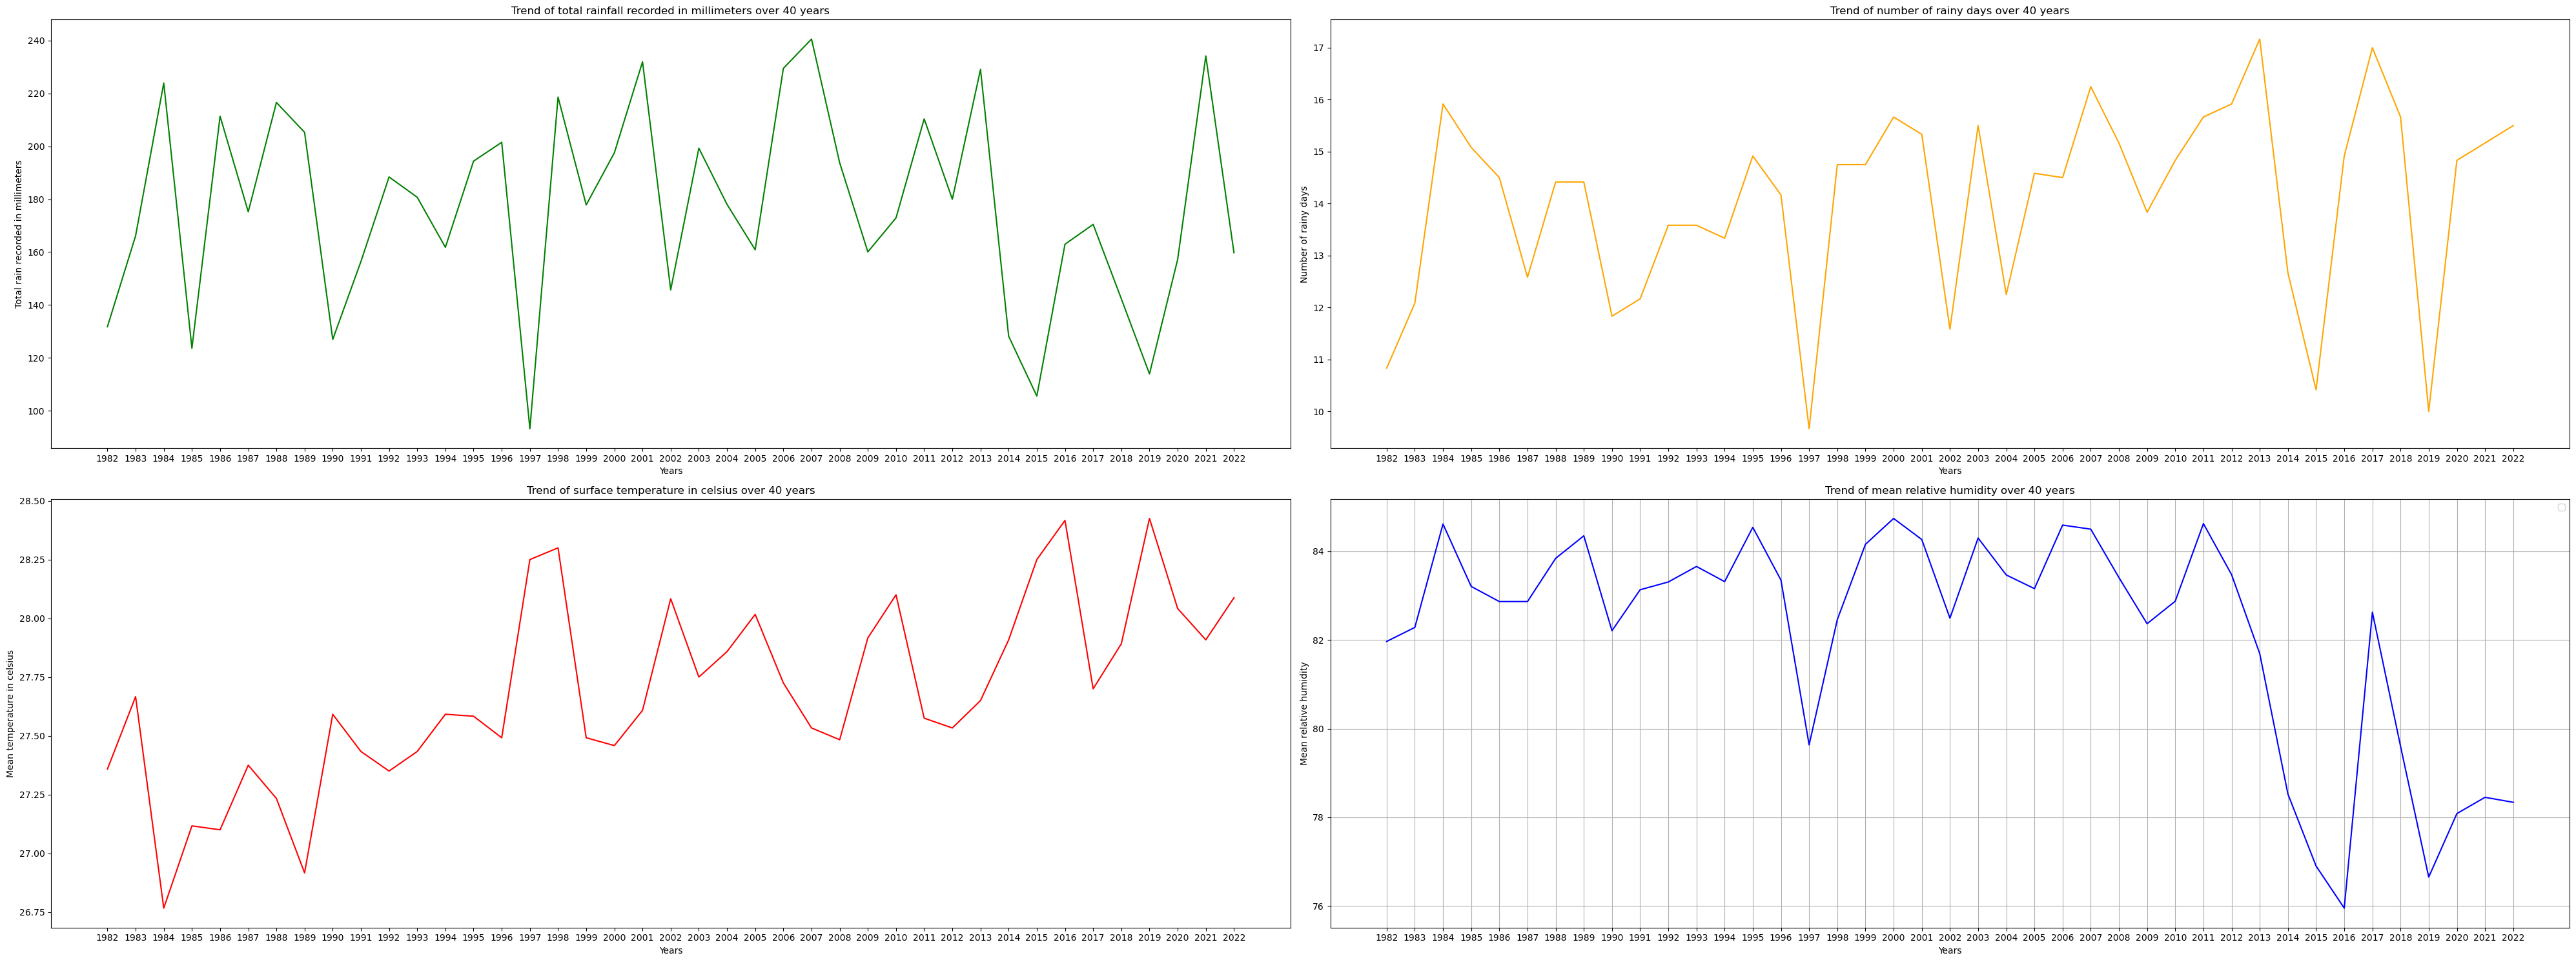

In [179]:
grouped = df3.groupby('year').agg({'total_rainfall': 'mean', 'no_of_rainy_days': 'mean', 'mean_temp': 'mean', 'mean_re_humid': 'mean'}).reset_index()

# Set up the figure size
plt.figure(figsize=(40, 15))

# Create subplots with 2 rows and 2 columns
# Subplot 1: Total Rainfall
plt.subplot(2, 2, 1)
plt.plot(grouped['year'], grouped['total_rainfall'], color='green')
plt.title('Trend of total rainfall recorded in millimeters over 40 years')
plt.xlabel('Years')
plt.ylabel('Total rain recorded in millimeters')

# Subplot 2: Number of Rainy Days
plt.subplot(2, 2, 2)
plt.plot(grouped['year'], grouped['no_of_rainy_days'], color='orange')
plt.title('Trend of number of rainy days over 40 years')
plt.xlabel('Years')
plt.ylabel('Number of rainy days')

# Subplot 3: Surface Temperature
plt.subplot(2, 2, 3)
plt.plot(grouped['year'], grouped['mean_temp'], color='red')
plt.title('Trend of surface temperature in celsius over 40 years')
plt.xlabel('Years')
plt.ylabel('Mean temperature in celsius')

# Subplot 4: Humidity
plt.subplot(2, 2, 4)
plt.plot(grouped['year'], grouped['mean_re_humid'], color='blue')
plt.title('Trend of mean relative humidity over 40 years')
plt.xlabel('Years')
plt.ylabel('Mean relative humidity')

# Adjust layout for subplots
plt.tight_layout()

# Display a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Reference1: National Environment Agency (NEA). (2023). Rainfall - Monthly Total. https://beta.data.gov.sg/collections/1398/view / 
Reference2: National Environment Agency (NEA). (2023). Rainfall - Monthly Number of Rain Days. https://beta.data.gov.sg/collections/1399/view / Reference3: National Environment Agency (NEA). (2023). Relative Humidity - Monthly Mean. https://beta.data.gov.sg/datasets/d_e3b1111a26b2aefef4f386c068d4ca5d/view/ / Reference4: National Environment Agency (NEA). (2023). Surface Air Temperature - Monthly Mean. https://beta.data.gov.sg/datasets/d_755290a24afe70c8f9e8bcbf9f251573/view /

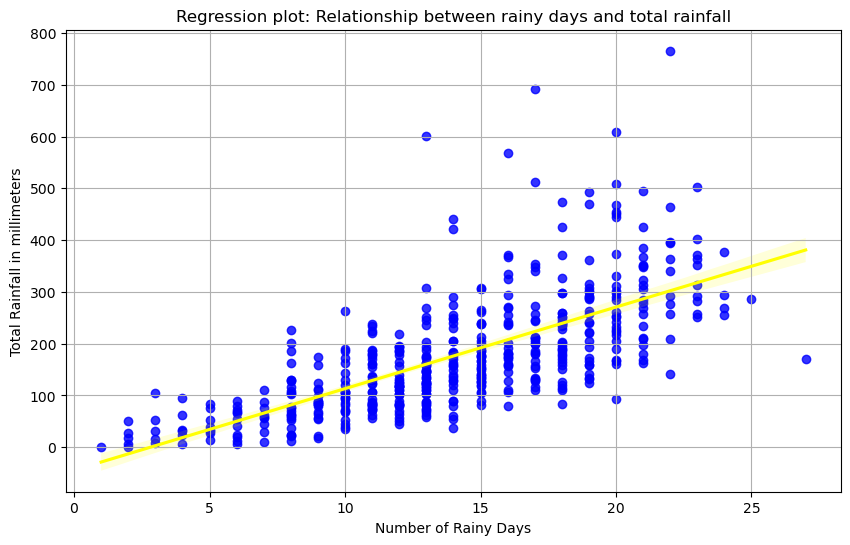

In [180]:
plt.figure(figsize=(10, 6))

# Create a regression plot (regplot) to visualize the relationship
sns.regplot(x='no_of_rainy_days', y='total_rainfall', data=df3,scatter_kws={"color": "blue"}, line_kws={"color": "yellow"})

# Set labels and title
plt.xlabel('Number of Rainy Days')
plt.ylabel('Total Rainfall in millimeters')
plt.title('Regression plot: Relationship between rainy days and total rainfall')

# Show the plot
plt.grid(True)
plt.show()

Reference1: National Environment Agency (NEA). (2023). Rainfall - Monthly Total. https://beta.data.gov.sg/collections/1398/view / Reference2: National Environment Agency (NEA). (2023). Rainfall - Monthly Number of Rain Days. https://beta.data.gov.sg/collections/1399/view

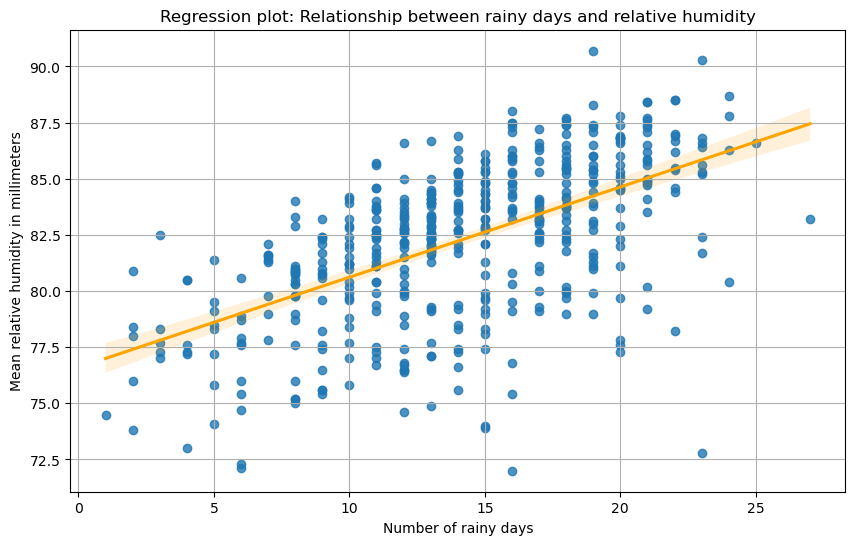

In [182]:
plt.figure(figsize=(10, 6))

# Create a regression plot (regplot) to visualize the relationship
sns.regplot(x='no_of_rainy_days', y='mean_re_humid', line_kws={"color": "orange"}, data=df3)

# Set labels and title
plt.xlabel('Number of rainy days')
plt.ylabel('Mean relative humidity in millimeters')
plt.title('Regression plot: Relationship between rainy days and relative humidity')

# Show the plot
plt.grid(True)
plt.show()

Reference1: National Environment Agency (NEA). (2023). Relative Humidity - Monthly Mean. https://beta.data.gov.sg/datasets/d_e3b1111a26b2aefef4f386c068d4ca5d/view/ / Reference2: National Environment Agency (NEA). (2023). Rainfall - Monthly Number of Rain Days. https://beta.data.gov.sg/collections/1399/view

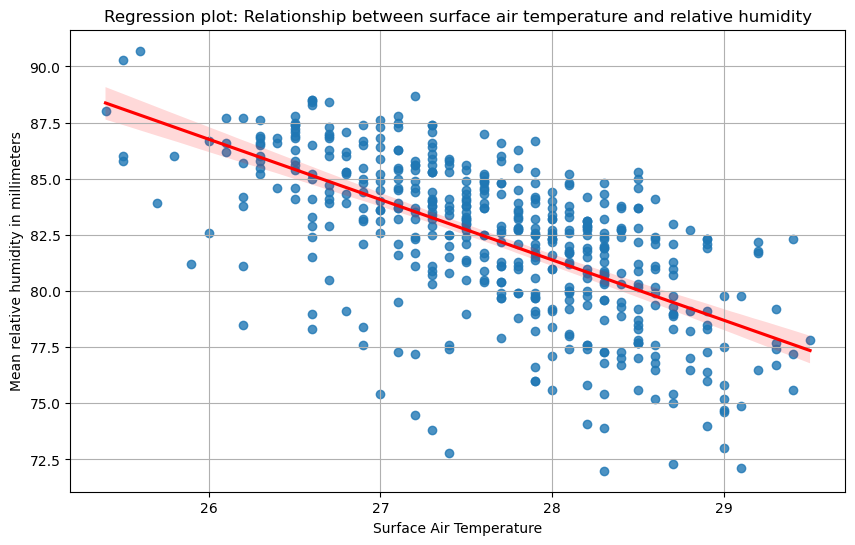

In [183]:
plt.figure(figsize=(10, 6))

# Create a regression plot (regplot) to visualize the relationship
sns.regplot(x='mean_temp', y='mean_re_humid' , line_kws={"color": "red"}, data=df3)
# Set labels and title
plt.xlabel('Surface Air Temperature')
plt.ylabel('Mean relative humidity in millimeters')
plt.title('Regression plot: Relationship between surface air temperature and relative humidity')

# Show the plot
plt.grid(True)
plt.show()

Reference1: National Environment Agency (NEA). (2023). Relative Humidity - Monthly Mean. https://beta.data.gov.sg/datasets/d_e3b1111a26b2aefef4f386c068d4ca5d/view/ / Reference2: National Environment Agency (NEA). (2023). Surface Air Temperature - Monthly Mean. https://beta.data.gov.sg/datasets/d_755290a24afe70c8f9e8bcbf9f251573/view

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:** *Edit this cell with your conclusions and recommendations.*

Conclusion/Recommendation

- November, December, and January: During these months are the periods when there is more overall rainfall than other months of the year.

During these months are the periods when there is more overall rainfall than other months of the year.

- Northeast monsoon season: In the Northeast Monsoon flow bringing major rainfall events.

Encouraging the agricultural sector to use rainwater in this period to care for agricultural land to reduce water use from other sources and for the industrial sector to use rainwater to conduct business and treat wastewater for reuse to reduce recycling costs to the cost of importing water from abroad. 

- Every months over the past 40 years: The trend of surface temperature is increasing every year.

Evaporation management is essential for a country with freshwater shortages and limited water resources when the temperature increases. The Singapore government should help support the development of modern technology from pulling water from the sea and distilling into freshwater , creating a water management plan and issuing a water control policy to reduce the loss and evaporation of water sources. 

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!